In [1]:
import numpy as np
import pandas as pd

In [2]:
STOCK_CODE = '233740'

In [3]:
FILE_NAME = f'./data/{STOCK_CODE}.dataset.csv'
df_stock = pd.read_csv(FILE_NAME, header=0, index_col=0,encoding='utf-8')

In [4]:
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock.head()

,date,closed_v,diff,open,max,min,closed,vol_index
0,2015-12-18,10710,3.678606,-0.968054,4.692082,-0.635386,4.692082,1.841150
1,2015-12-21,10720,0.093371,-0.140056,1.215521,-0.233754,0.233754,1.274858
2,2015-12-22,10495,-2.098881,0.186567,0.093110,-2.700186,-2.281192,1.374974
3,2015-12-23,10425,-0.666984,0.381134,0.949217,-1.139060,-1.044139,2.532341
4,2015-12-24,10295,-1.247002,0.527578,0.429389,-1.812977,-1.765267,1.536790


In [5]:
df_dataset = df_stock.drop('diff', axis='columns')
df_dataset.head()

,date,closed_v,open,max,min,closed,vol_index
0,2015-12-18,10710,-0.968054,4.692082,-0.635386,4.692082,1.841150
1,2015-12-21,10720,-0.140056,1.215521,-0.233754,0.233754,1.274858
2,2015-12-22,10495,0.186567,0.093110,-2.700186,-2.281192,1.374974
3,2015-12-23,10425,0.381134,0.949217,-1.139060,-1.044139,2.532341
4,2015-12-24,10295,0.527578,0.429389,-1.812977,-1.765267,1.536790


In [6]:
df_dataset['date'] = pd.to_datetime(df_dataset['date'],format='%Y%m%d')
df_dataset = df_dataset.set_index('date')

df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1650 entries, 2015-12-18 to 2022-09-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   closed_v   1650 non-null   int64  
 1   open       1650 non-null   float64
 2   max        1650 non-null   float64
 3   min        1650 non-null   float64
 4   closed     1650 non-null   float64
 5   vol_index  1650 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 90.2 KB


In [7]:
df_dataset.head()

,closed_v,open,max,min,closed,vol_index
date,,,,,,
2015-12-18,10710,-0.968054,4.692082,-0.635386,4.692082,1.841150
2015-12-21,10720,-0.140056,1.215521,-0.233754,0.233754,1.274858
2015-12-22,10495,0.186567,0.093110,-2.700186,-2.281192,1.374974
2015-12-23,10425,0.381134,0.949217,-1.139060,-1.044139,2.532341
2015-12-24,10295,0.527578,0.429389,-1.812977,-1.765267,1.536790


In [8]:
import datetime 

train = df_dataset.loc[:datetime.datetime(2022,5,31),:]
test = df_dataset.loc[datetime.datetime(2022,6,1):,:]
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1584 entries, 2015-12-18 to 2022-05-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   closed_v   1584 non-null   int64  
 1   open       1584 non-null   float64
 2   max        1584 non-null   float64
 3   min        1584 non-null   float64
 4   closed     1584 non-null   float64
 5   vol_index  1584 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 86.6 KB
None


,closed_v,open,max,min,closed,vol_index
date,,,,,,
2015-12-18,10710,-0.968054,4.692082,-0.635386,4.692082,1.841150
2015-12-21,10720,-0.140056,1.215521,-0.233754,0.233754,1.274858
2015-12-22,10495,0.186567,0.093110,-2.700186,-2.281192,1.374974
2015-12-23,10425,0.381134,0.949217,-1.139060,-1.044139,2.532341
2015-12-24,10295,0.527578,0.429389,-1.812977,-1.765267,1.536790


In [9]:
print(test.info())
test.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2022-06-02 to 2022-09-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   closed_v   66 non-null     int64  
 1   open       66 non-null     float64
 2   max        66 non-null     float64
 3   min        66 non-null     float64
 4   closed     66 non-null     float64
 5   vol_index  66 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 3.6 KB
None


,closed_v,open,max,min,closed,vol_index
date,,,,,,
2022-08-30,8775,1.266586,4.705182,-0.059559,4.526504,13.612929
2022-08-31,8975,-2.279202,5.947522,-0.174927,4.664723,12.716509
2022-09-01,8510,-2.395543,0.285388,-3.481735,-2.853881,11.654272
2022-09-02,8505,1.821387,0.461627,-2.885170,-1.846509,16.814533
2022-09-05,8190,-0.117578,0.529723,-4.237787,-3.590347,14.935814


In [10]:
train = train.reset_index().rename(columns={'closed_v':'y'})
train['ds'] = pd.to_datetime(train['date'].astype(str))
train = train.drop('date',axis=1)
train.head()

,y,open,max,min,closed,vol_index,ds
0,10710,-0.968054,4.692082,-0.635386,4.692082,1.841150,2015-12-18
1,10720,-0.140056,1.215521,-0.233754,0.233754,1.274858,2015-12-21
2,10495,0.186567,0.093110,-2.700186,-2.281192,1.374974,2015-12-22
3,10425,0.381134,0.949217,-1.139060,-1.044139,2.532341,2015-12-23
4,10295,0.527578,0.429389,-1.812977,-1.765267,1.536790,2015-12-24


In [11]:
test = test.reset_index().rename(columns={'closed_v':'y'})
test['ds'] = pd.to_datetime(test['date'].astype(str))
test = test.drop('date',axis=1)
test.head()

,y,open,max,min,closed,vol_index,ds
0,10955,-1.034638,0.636364,-1.000000,-0.409091,6.825550,2022-06-02
1,10900,2.145139,0.178731,-2.993744,-2.591600,8.486698,2022-06-03
2,10255,-0.688073,0.230947,-5.404157,-5.265589,10.629725,2022-06-07
3,10325,1.170161,1.253012,-1.253012,-0.481928,9.217295,2022-06-08
4,10490,-0.677966,2.291565,-1.950268,2.291565,7.357790,2022-06-09


## Prophet Model Training 

In [12]:
from prophet import Prophet

In [13]:
model_1 = Prophet(yearly_seasonality=True)
model_1.fit(train)

23:17:41 - cmdstanpy - INFO - Chain [1] start processing
23:17:42 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
forecast_1 = model_1.predict(test)
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-02,11988.736531,10450.308040,14004.154069,11988.736531,11988.736531,257.292882,257.292882,257.292882,126.383873,126.383873,126.383873,130.909008,130.909008,130.909008,0.0,0.0,0.0,12246.029413
1,2022-06-03,11980.389162,10540.127664,14006.652856,11980.389162,11980.389162,279.495498,279.495498,279.495498,116.430476,116.430476,116.430476,163.065022,163.065022,163.065022,0.0,0.0,0.0,12259.884661
2,2022-06-07,11946.999687,10644.388980,14322.882769,11946.999687,11946.999687,377.610242,377.610242,377.610242,129.999045,129.999045,129.999045,247.611196,247.611196,247.611196,0.0,0.0,0.0,12324.609928
3,2022-06-08,11938.652318,10582.596180,14047.563880,11938.652318,11938.652318,391.323958,391.323958,391.323958,132.980631,132.980631,132.980631,258.343327,258.343327,258.343327,0.0,0.0,0.0,12329.976276
4,2022-06-09,11930.304949,10453.294773,14089.850653,11930.304949,11930.304949,391.729725,391.729725,391.729725,126.383873,126.383873,126.383873,265.345851,265.345851,265.345851,0.0,0.0,0.0,12322.034674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2022-08-30,11245.820703,9423.016867,13413.559195,10688.712745,11910.835235,219.357464,219.357464,219.357464,129.999045,129.999045,129.999045,89.358418,89.358418,89.358418,0.0,0.0,0.0,11465.178166
62,2022-08-31,11237.473334,9518.130125,13567.103419,10661.853409,11917.169658,286.574260,286.574260,286.574260,132.980631,132.980631,132.980631,153.593629,153.593629,153.593629,0.0,0.0,0.0,11524.047593
63,2022-09-01,11229.125965,9716.322303,13452.536746,10641.481509,11924.671913,342.736805,342.736805,342.736805,126.383873,126.383873,126.383873,216.352932,216.352932,216.352932,0.0,0.0,0.0,11571.862770
64,2022-09-02,11220.778596,9673.721777,13648.790885,10614.760076,11928.000483,393.215136,393.215136,393.215136,116.430476,116.430476,116.430476,276.784660,276.784660,276.784660,0.0,0.0,0.0,11613.993732


## 결과 확인

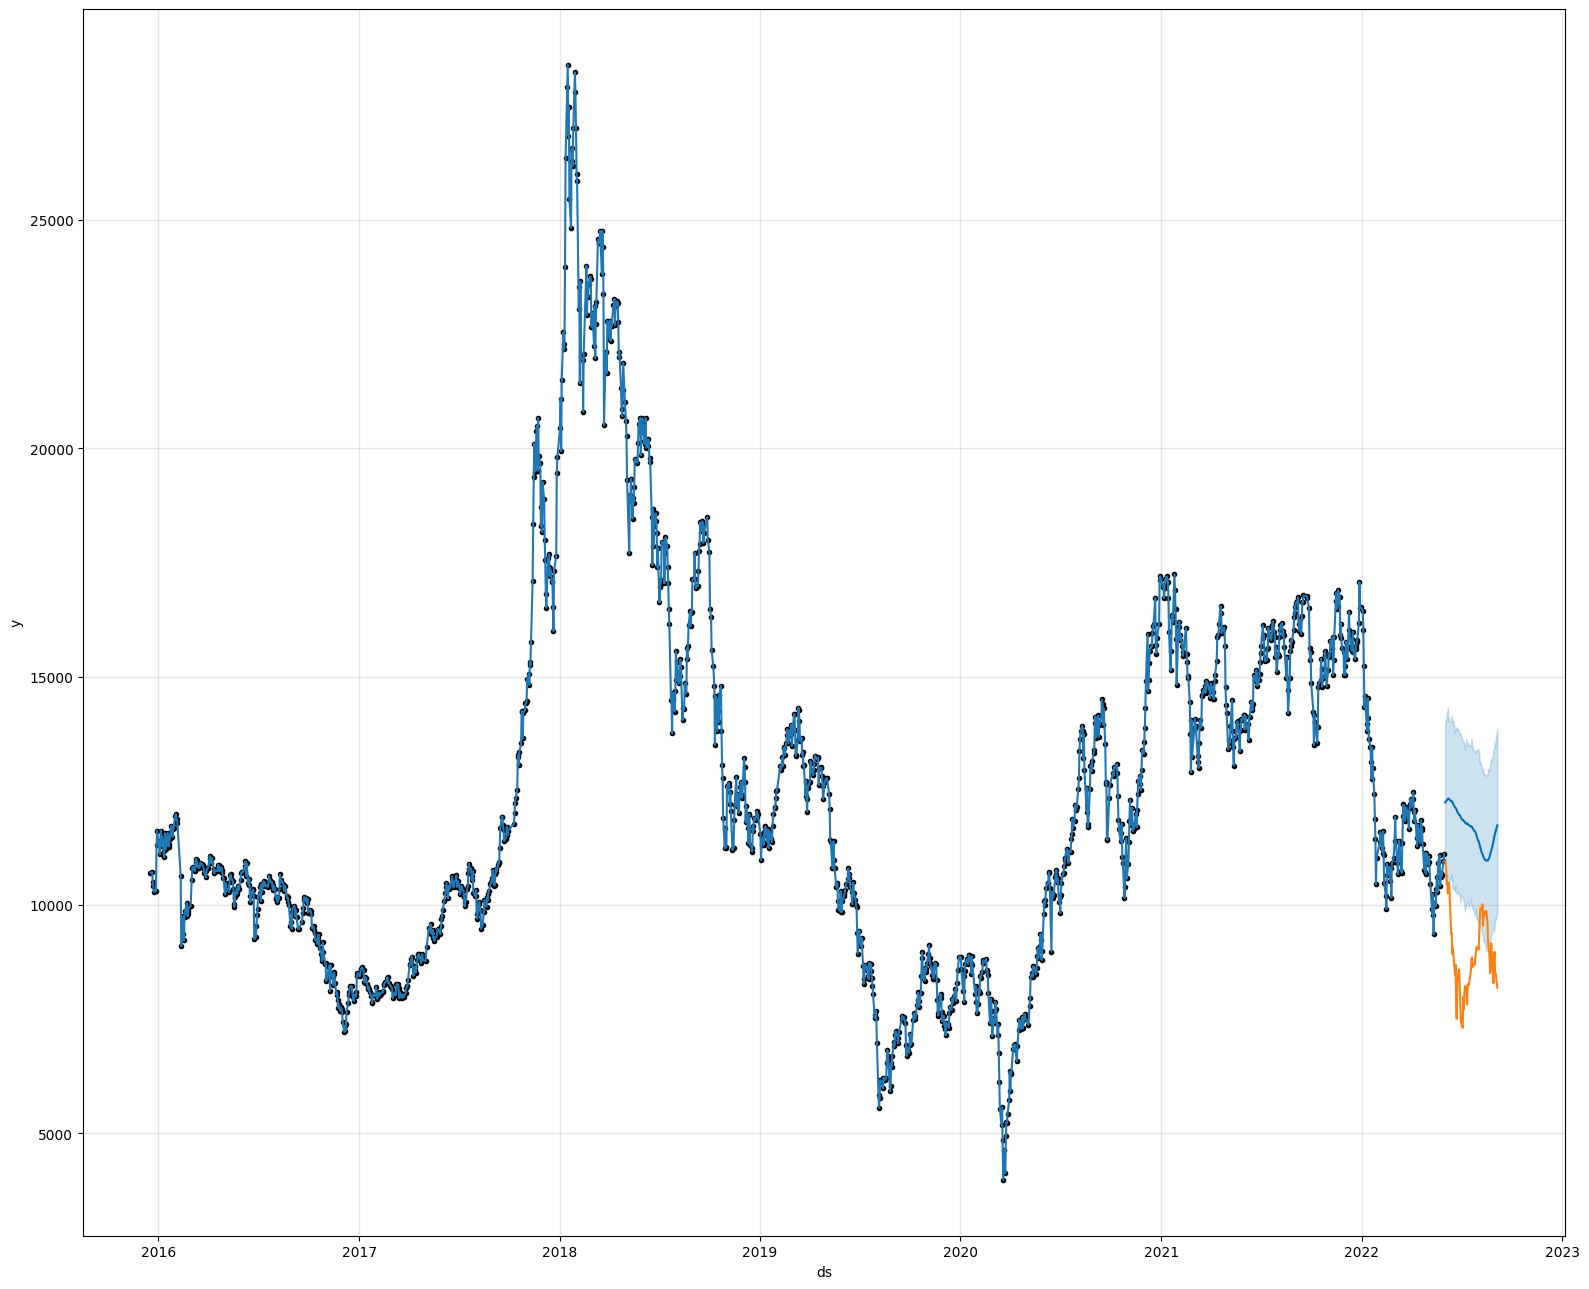

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(16,13))
model_1.plot(forecast_1, ax=ax)
plt.plot(train['ds'],train['y'])
plt.plot(test['ds'],test['y'])

## 모델 최적화

23:17:44 - cmdstanpy - INFO - Chain [1] start processing
23:17:44 - cmdstanpy - INFO - Chain [1] done processing


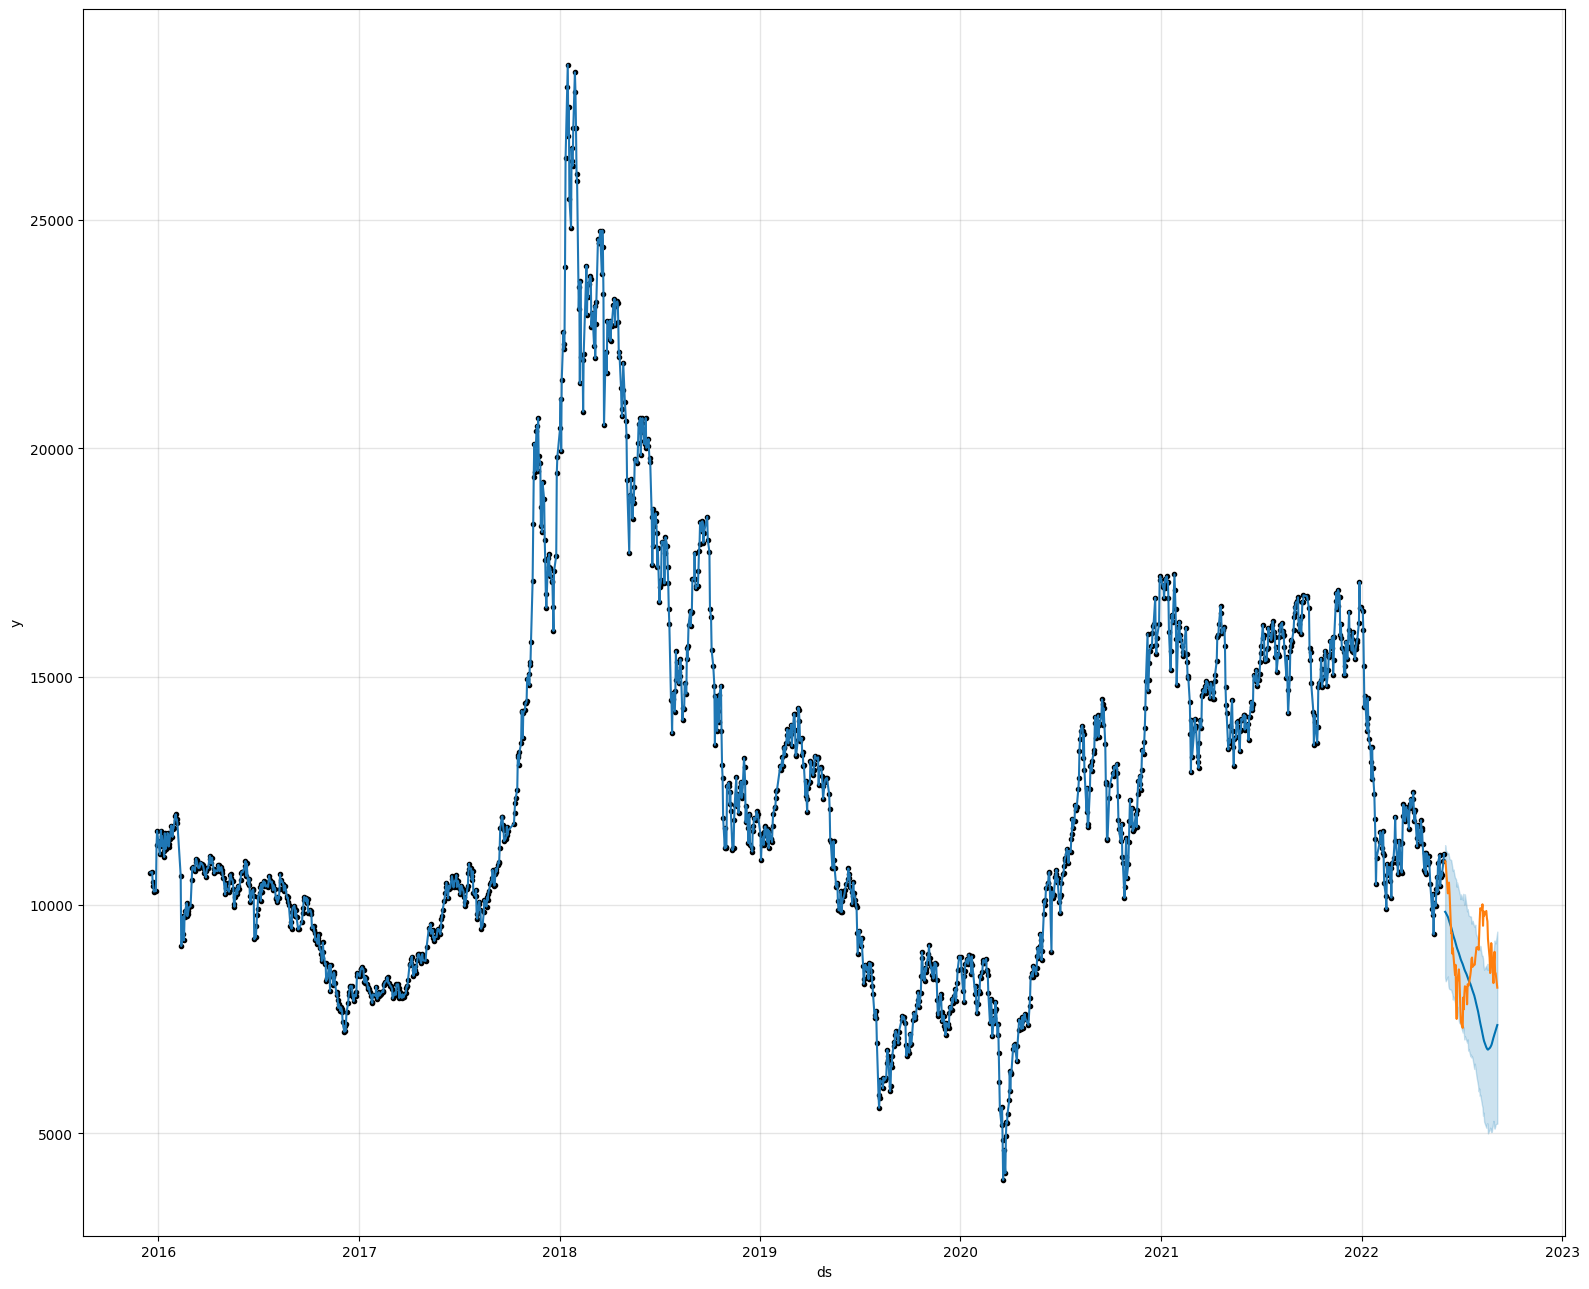

In [16]:
## 트렌드가 변화하는 지점을 더 잘 찾기 위한 특성
## range 기본 값은 0.8, scale 기본은 0.05
model_2 = Prophet(yearly_seasonality=True, changepoint_range=0.9, changepoint_prior_scale=0.1)
model_2.fit(train)

forecast_2 = model_2.predict(test)

fig,ax=plt.subplots(figsize=(16,13))
model_2.plot(forecast_2, ax=ax)
plt.plot(train['ds'],train['y'])
plt.plot(test['ds'],test['y'])

23:17:46 - cmdstanpy - INFO - Chain [1] start processing
23:17:46 - cmdstanpy - INFO - Chain [1] done processing


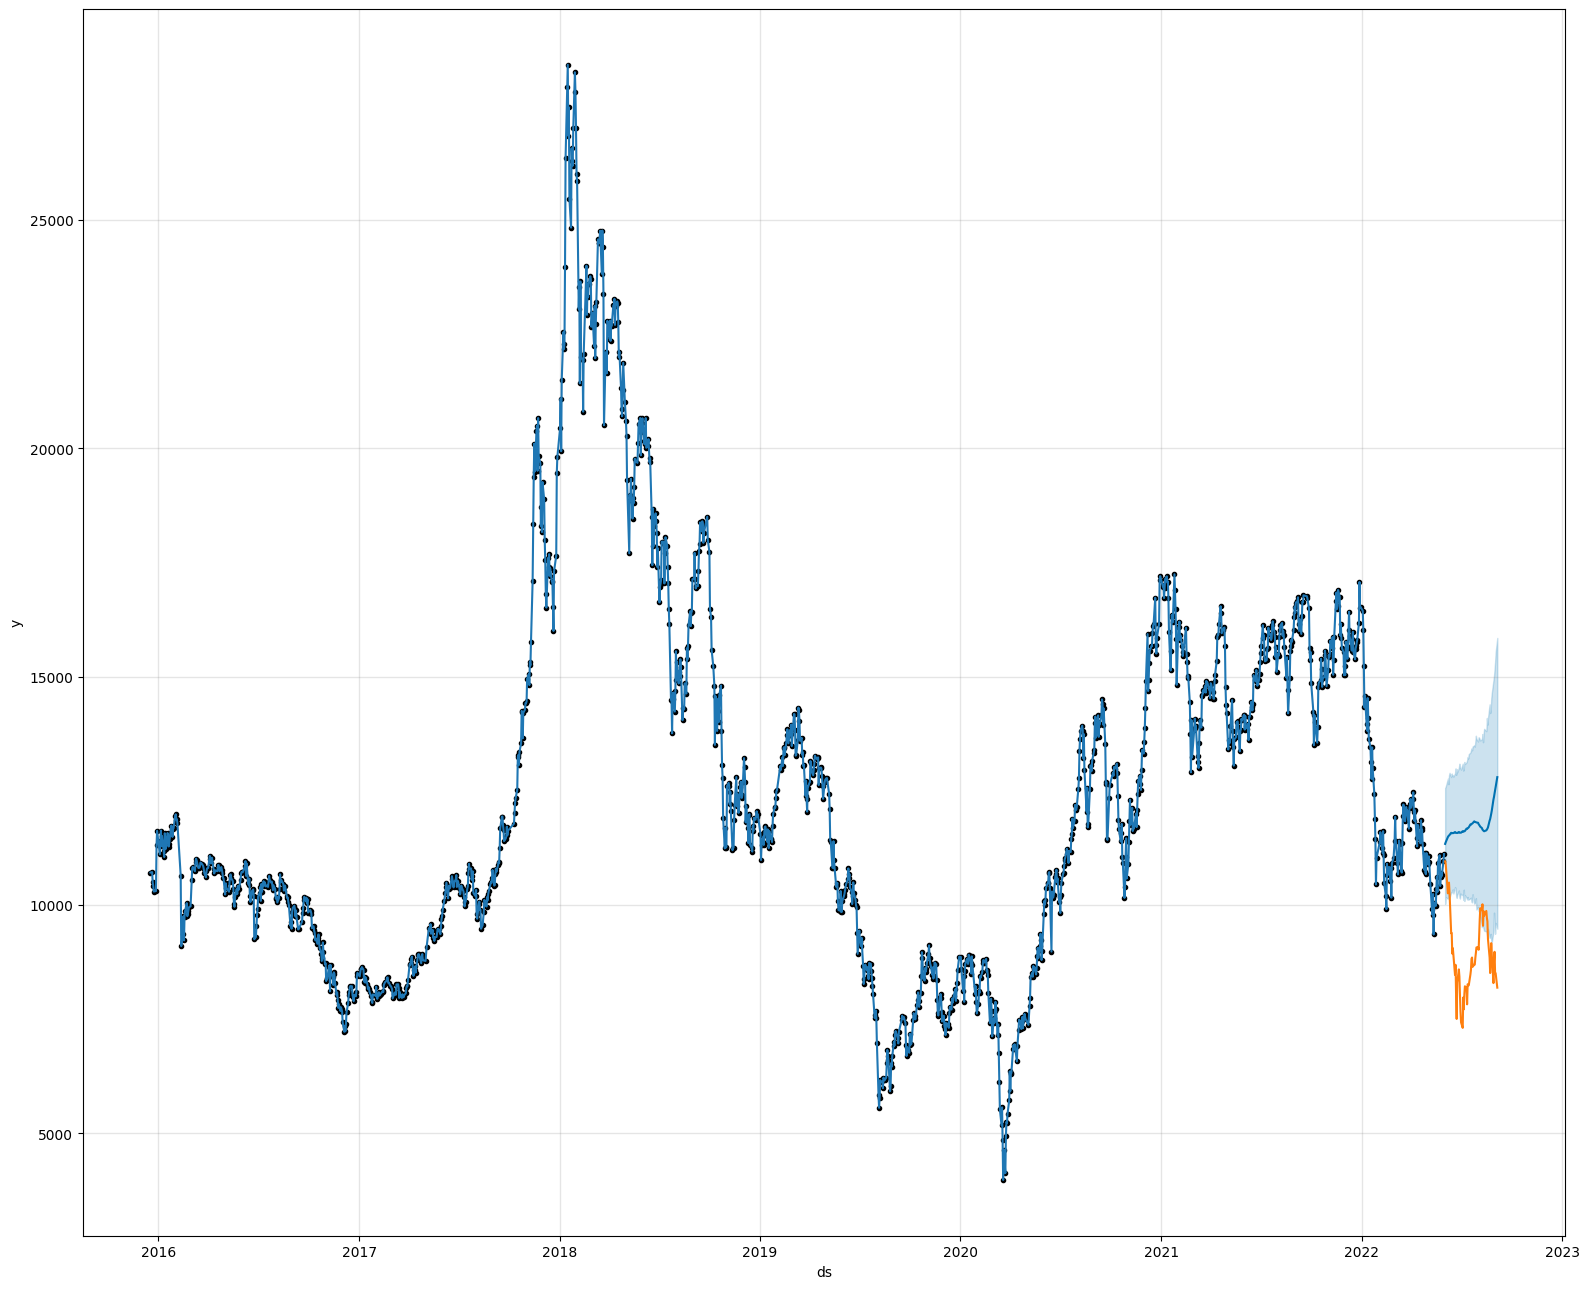

In [17]:
## 트렌드가 변화하는 지점을 더 잘 찾기 위한 특성
## range 기본 값은 0.8, scale 기본은 0.05
model_3 = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.5)
model_3.fit(train)

forecast_3 = model_3.predict(test)

fig,ax=plt.subplots(figsize=(16,13))
model_3.plot(forecast_3, ax=ax)
plt.plot(train['ds'],train['y'])
plt.plot(test['ds'],test['y'])